In [2]:
#!pip install category_encoders
import category_encoders as ce
import pandas as pd
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
sales=pd.read_csv(r"C:\Users\Vish\Desktop\ExcelR\Assignments\10. Decision Trees\Company_Data.csv")
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# checking for null values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
sales.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
sales1 = encoder.fit_transform(sales)

In [7]:
# Converting the Target column i.e. Sales into Categorical value using mean of the column i.e. 7.49
sales_val = []
for value in sales["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [8]:
sales1.head(9)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
5,10.81,124,113,13,501,72,1,78,16,2,1,high
6,6.63,115,105,0,45,108,3,71,15,1,2,low
7,11.85,136,81,15,425,120,2,67,10,1,1,high
8,6.54,132,110,0,108,124,3,76,10,2,2,low


# EDA 

In [9]:
sales.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
sales.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [11]:
sales.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [12]:
sales1.sales_val.value_counts()

low     201
high    199
Name: sales_val, dtype: int64

# Categorical Variables with respec to sales_tax

<IPython.core.display.Javascript object>

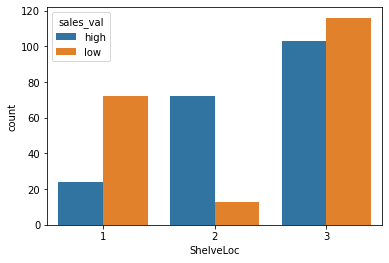

In [26]:
#plot for ShelveLoc 
sns.countplot(x='ShelveLoc', hue='sales_val' ,data=sales1)

<IPython.core.display.Javascript object>

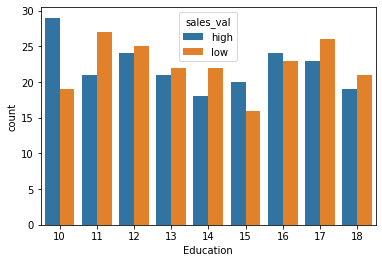

In [27]:
#plot for Education
sns.countplot(x='Education', hue='sales_val' ,data=sales1)

<IPython.core.display.Javascript object>

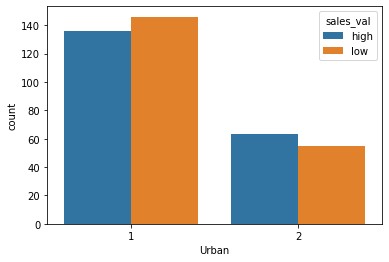

In [36]:
#plot for Urban
sns.countplot(x='Urban', hue='sales_val' ,data=sales1)

<IPython.core.display.Javascript object>

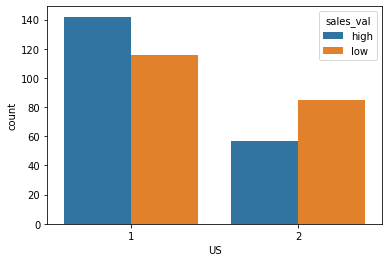

In [35]:
#plot for US
sns.countplot(x='US', hue='sales_val' ,data=sales1)

<IPython.core.display.Javascript object>

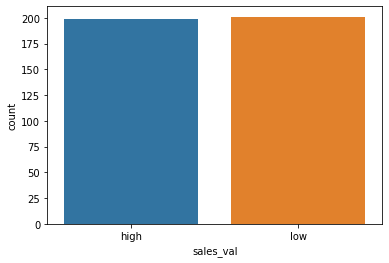

In [34]:
#plot for sales
sns.countplot(x='sales_val', data=sales1)

Count of high and low sales are almost equal.

# Splitting Dataset

In [13]:
x = sales1.drop(['sales_val','Sales'], axis =1)
y = sales1['sales_val']

# Random Forest Classification

In [14]:
num_trees = 200
max_features = 4
kfold = KFold(n_splits=15)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8076923076923078



We can further use various ensemble techniques to check the accuracy %

# Bagging

In [15]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=15, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 200
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, x, y, cv=kfold)
print(results1.mean())

0.817473884140551


# Boosting

In [16]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 200
seed=7
kfold = KFold(n_splits=15, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, x, y, cv=kfold)
print(results2.mean())

0.8627730294396961


# Stacking

In [17]:
# Iteration -1
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))

model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))

model5 = SVC()
estimators.append(('svm', model5))

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))

model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, x, y, cv=kfold)
print(results3.mean()*100)

83.50427350427351


### Iteration - 2

In [18]:
# create the sub models
estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))
model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))
model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))
model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, x, y, cv=kfold)
print(results4.mean()*100)

86.01139601139603


### Iteration -3

In [19]:
# create the sub models
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))
model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))
model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble modSel
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, x, y, cv=kfold)
print(results5.mean()*100)

86.0303893637227


### Iteration -4

In [20]:
# create the sub models
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))
model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, x, y, cv=kfold)
print(results6.mean()*100)

80.02849002849003


### Iteration - 5

In [21]:
# create the sub models
estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))
model18 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model18))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results7 = cross_val_score(ensemble, x, y, cv=kfold)
print(results7.mean()*100)

84.26400759734094


# Insights

+ Stacking Iter-2 gave us 86%
+ Random Forest gave us 80%
+ Bagging gave us 81%
+ Boosting gave us 86% 


So we can consider our final model with stacking iteration-2 with **86%** Accuracy